In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.7 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

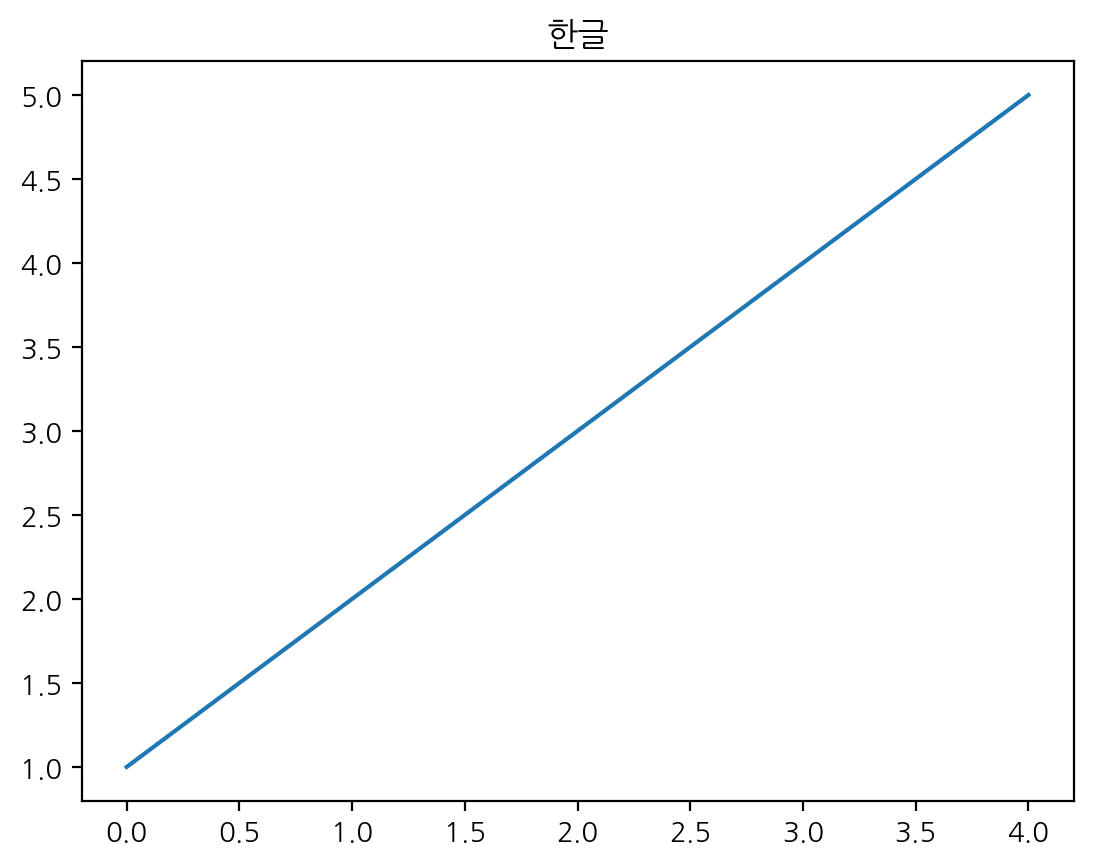

In [3]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 2, 3, 4, 5]).plot(title='한글')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/finalPJT/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/'

In [7]:
# 측정 csv 가져오기 #
measurement_raw = pd.read_csv(folder_path+'measurement_data.csv', index_col=0)
measurement = measurement_raw.copy()
print(measurement.shape)
measurement.head(2)

(1072, 80)


,ID,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,1,53.0,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,15.760,95.142,41.774,98.502,70.769,46.387,52.115,147,608,629
1,2,75.0,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631


In [8]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1071
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1072 non-null   int64  
 1   수분_이마            1072 non-null   float64
 2   수분_오른쪽볼          1072 non-null   float64
 3   수분_왼쪽볼           1072 non-null   float64
 4   수분_턱             1072 non-null   float64
 5   탄력_턱_R0          1072 non-null   float64
 6   탄력_턱_R1          1072 non-null   float64
 7   탄력_턱_R2          1072 non-null   float64
 8   탄력_턱_R3          1072 non-null   float64
 9   탄력_턱_R4          1072 non-null   float64
 10  탄력_턱_R5          1072 non-null   float64
 11  탄력_턱_R6          1072 non-null   float64
 12  탄력_턱_R7          1072 non-null   float64
 13  탄력_턱_R8          1072 non-null   float64
 14  탄력_턱_R9          1072 non-null   float64
 15  탄력_턱_Q0          1072 non-null   float64
 16  탄력_턱_Q1          1072 non-null   float64
 17  탄력_턱_Q2          10

In [ ]:
# annotation
annotation_raw = pd.read_csv(folder_path+'annotation_data.csv', index_col=0)
annotation = annotation_raw.copy()
print(annotation.shape)
annotation.head(2)

(2895, 14)


,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
1,1,L,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
0,1,F,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0


In [9]:
def keyword_df(df, keyword):
    # keyword가 포함된 컬럼명 필터링
    keyword_columns = [col for col in df.columns if keyword in col]

    # 필터링된 컬럼들로 새로운 데이터프레임 생성
    filtered_df = df[['ID'] + keyword_columns]

    return filtered_df

# 탄력 - 턱

In [10]:
chin_elasticity = keyword_df(measurement, '탄력_턱')
# chin_elasticity = chin_elasticity.iloc[:, :-4]
chin_elasticity = chin_elasticity.drop(columns=['탄력_턱_R6', '탄력_턱_R0', '탄력_턱_R1', '탄력_턱_R3', '탄력_턱_R4', '탄력_턱_R8', '탄력_턱_R9', '탄력_턱_Q0'])
print(chin_elasticity.shape)
chin_elasticity.head(2)

(1072, 7)


,ID,탄력_턱_R2,탄력_턱_R5,탄력_턱_R7,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
0,1,0.5931,0.6306,0.3431,0.5294,0.4281,0.1013
1,2,0.6846,0.5657,0.3548,0.6059,0.4571,0.1488


## PCA

* 분산 : 퍼진 정도 클수록 넓게 퍼져있다.
* 공분산 : 두 데이터간 방향성
    * 양수 : 두 데이터 간 상관관계가 양이다. 증가할 때 증가한다.
    * 음수 : 증가할 때 감소한다.
    * ==> 방향성만 알 수 있음. 힘은 모른다.

* 상관계수 : 얼마나 비슷한지에 대한 척도, 데이터의 크기가 기하급수로 커지는 현상 해결
    * 상관계수가 -1이라면, 하나의 데이터가 1만큼 증가하면 다른 데이터는 1만큼 감소한다.
    * 이때, 방향성, 크기 둘다 증가한다.

* 두 데이터 간의 공분산 행렬에서 나온 고유벡터 = component
* 주성분 : 분산을 잘 설명하는 성분 (분산이 가장 큰 값이 주성분이 된다.)